In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
num_imgs = 50000

img_size = 8
min_object_size = 1
max_object_size = 4
num_objects = 1

bboxes = np.zeros((num_imgs, num_objects, 4))
imgs = np.zeros((num_imgs, img_size, img_size))  # set background to 0

for i_img in range(num_imgs):
    for i_object in range(num_objects):
        w, h = np.random.randint(min_object_size, max_object_size, size=2)
        x = np.random.randint(0, img_size - w)
        y = np.random.randint(0, img_size - h)
        imgs[i_img, x:x+w, y:y+h] = 1.  # set rectangle to 1
        bboxes[i_img, i_object] = [x, y, w, h]
        
imgs.shape, bboxes.shape

((50000, 8, 8), (50000, 1, 4))

In [19]:
print(bboxes)

[[[1. 4. 2. 2.]]

 [[5. 4. 2. 1.]]

 [[3. 1. 2. 3.]]

 ...

 [[5. 2. 2. 3.]]

 [[1. 3. 1. 3.]]

 [[4. 3. 1. 1.]]]


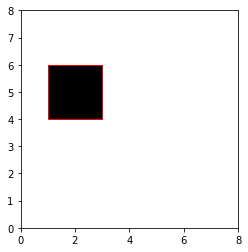

In [5]:
i = 0
plt.imshow(imgs[i].T, cmap='Greys', interpolation='none', origin='lower', extent=[0, img_size, 0, img_size])
for bbox in bboxes[i]:
    plt.gca().add_patch(matplotlib.patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], ec='r', fc='none'))

In [0]:
X=(imgs-np.mean(imgs.flatten()))/np.std(imgs.flatten())


In [7]:
X = (imgs.reshape(num_imgs, -1) - np.mean(imgs)) / np.std(imgs)
X.shape, np.mean(X), np.std(X)

((50000, 64), 7.37454541877014e-17, 1.000000000000002)

In [8]:
y = bboxes.reshape(num_imgs, -1) / img_size
y.shape, np.mean(y), np.std(y)

((50000, 4), 0.28186375, 0.17490492470464486)

In [0]:
i = int(0.8 * num_imgs)
train_X = X[:i]
test_X = X[i:]
train_y = y[:i]
test_y = y[i:]
test_imgs = imgs[i:]
test_bboxes = bboxes[i:]

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
model = Sequential([
        Dense(200, input_dim=X.shape[-1]), 
        Activation('relu'), 
        Dropout(0.2), 
        Dense(y.shape[-1])
    ])
model.compile('adadelta', 'mse')

Using TensorFlow backend.
W0831 05:01:32.996661 139679620507520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0831 05:01:33.039680 139679620507520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0831 05:01:33.052555 139679620507520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0831 05:01:33.069665 139679620507520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instea

In [11]:
model.fit(train_X, train_y, nb_epoch=30, validation_data=(test_X, test_y), verbose=2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0831 05:01:33.827588 139679620507520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 40000 samples, validate on 10000 samples
Epoch 1/30
 - 10s - loss: 0.0266 - val_loss: 6.4270e-04
Epoch 2/30
 - 3s - loss: 0.0018 - val_loss: 2.7221e-04
Epoch 3/30
 - 3s - loss: 0.0013 - val_loss: 1.8037e-04
Epoch 4/30
 - 3s - loss: 0.0011 - val_loss: 1.6687e-04
Epoch 5/30
 - 4s - loss: 0.0010 - val_loss: 1.6774e-04
Epoch 6/30
 - 3s - loss: 9.3654e-04 - val_loss: 1.1447e-04
Epoch 7/30
 - 3s - loss: 8.9681e-04 - val_loss: 1.1705e-04
Epoch 8/30
 - 3s - loss: 8.5871e-04 - val_loss: 1.1769e-04
Epoch 9/30
 - 3s - loss: 8.3401e-04 - val_loss: 8.5135e-05
Epoch 10/30
 - 3s - loss: 8.0685e-04 - val_loss: 9.2354e-05
Epoch 11/30
 - 3s - loss: 7.9352e-04 - val_loss: 9.1225e-05
Epoch 12/30
 - 3s - loss: 7.6870e-04 - val_loss: 9.4667e-05
Epoch 13/30
 - 3s - loss: 7.6199e-04 - val_loss: 6.4725e-05
Epoch 14/30
 - 3s - loss: 7.3759e-04 - val_loss: 8.7816e-05
Epoch 15/30
 - 3s - loss: 7.3563e-04 - val_loss: 6.4834e-05
Epoch 16/30
 - 3s - loss: 7.2749e-04 - val_loss: 9.6198e-05
Epoch 17/30
 - 3s 

In [12]:
pred_y = model.predict(test_X)
pred_bboxes = pred_y * img_size
pred_bboxes = pred_bboxes.reshape(len(pred_bboxes), num_objects, -1)
pred_bboxes.shape

(10000, 1, 4)

In [15]:
np.shape(pred_bboxes)

(10000, 1, 4)

In [16]:
pred_bboxes

array([[[1.9844722 , 1.990078  , 2.9739532 , 0.9932748 ]],

       [[0.07957292, 3.908103  , 2.9596648 , 1.0176272 ]],

       [[4.9798384 , 1.0362782 , 1.0805866 , 1.8914193 ]],

       ...,

       [[4.8457785 , 2.0505936 , 2.0104427 , 2.9488914 ]],

       [[1.0123149 , 2.904862  , 1.0725942 , 2.922841  ]],

       [[3.9406435 , 2.998291  , 0.97484183, 0.9366671 ]]], dtype=float32)

In [0]:
for i in range (0, np.size)

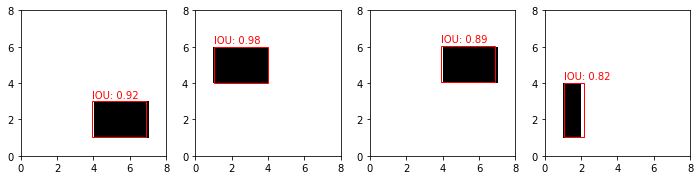

In [23]:
plt.figure(figsize=(12, 3))
for i_subplot in range(1, 5):
    plt.subplot(1, 4, i_subplot)
    i = np.random.randint(len(test_imgs))
    plt.imshow(test_imgs[i].T, cmap='Greys', interpolation='none', origin='lower', extent=[0, img_size, 0, img_size])
    for pred_bbox, exp_bbox in zip(pred_bboxes[i], test_bboxes[i]):
        plt.gca().add_patch(matplotlib.patches.Rectangle((pred_bbox[0], pred_bbox[1]), pred_bbox[2], pred_bbox[3], ec='r', fc='none'))
        plt.annotate('IOU: {:.2f}'.format(IOU(pred_bbox, exp_bbox)), (pred_bbox[0], pred_bbox[1]+pred_bbox[3]+0.2), color='r')